Inputs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_size = int(input("Enter the number of values for X: "))
y_size = int(input("Enter the number of values for Y: "))
x_values = np.array([float(input(f"X[{i+1}]: ")) for i in range(x_size)])
y_values = np.array([float(input(f"Y[{i+1}]: ")) for i in range(y_size)])
joint_pmf = np.array([float(input(f"Joint PMF for X={x_values[i]} and Y={y_values[j]}: "))
    for i in range(x_size) for j in range(y_size)]).reshape(x_size, y_size)

Enter the number of values for X: 3
Enter the number of values for Y: 2
X[1]: 0.2
X[2]: 0.4
X[3]: 0.4
Y[1]: 0.6
Y[2]: 0.4
Joint PMF for X=0.2 and Y=0.6: 0.1
Joint PMF for X=0.2 and Y=0.4: 0.1
Joint PMF for X=0.4 and Y=0.6: 0.1
Joint PMF for X=0.4 and Y=0.4: 0.1
Joint PMF for X=0.4 and Y=0.6: 0.1
Joint PMF for X=0.4 and Y=0.4: 0.5


Question 1

In [ ]:
def check_independence(joint_pmf, x_values, y_values):
    pmf_x = np.sum(joint_pmf, axis=1)
    pmf_y = np.sum(joint_pmf, axis=0)
    product_pmf = np.outer(pmf_x, pmf_y)
    return np.allclose(joint_pmf, product_pmf)

independence = check_independence(joint_pmf, x_values, y_values)
print("Are X and Y independent?", independence)

Are X and Y independent? False


Question 2

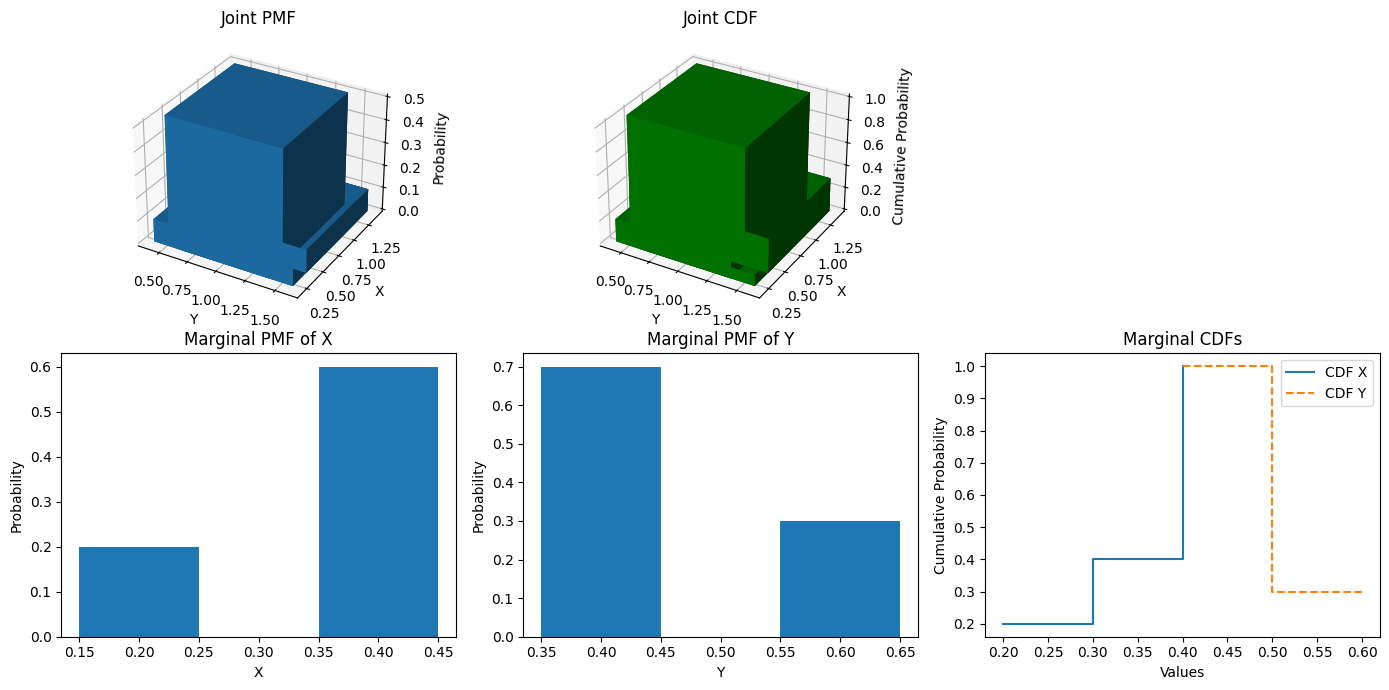

In [ ]:
def plot_distributions(joint_pmf, x_values, y_values):

    fig = plt.figure(figsize=(14, 7))

    ax = fig.add_subplot(231, projection='3d')
    X, Y = np.meshgrid(y_values, x_values)
    ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(joint_pmf.ravel()), 1, 1, joint_pmf.ravel())
    ax.set_title('Joint PMF')
    ax.set_xlabel('Y')
    ax.set_ylabel('X')
    ax.set_zlabel('Probability')

    joint_cdf = np.cumsum(np.cumsum(joint_pmf, axis=0), axis=1)
    ax2 = fig.add_subplot(232, projection='3d')
    ax2.bar3d(X.ravel(), Y.ravel(), np.zeros_like(joint_cdf.ravel()), 1, 1, joint_cdf.ravel(), color='g')
    ax2.set_title('Joint CDF')
    ax2.set_xlabel('Y')
    ax2.set_ylabel('X')
    ax2.set_zlabel('Cumulative Probability')

    pmf_x = np.sum(joint_pmf, axis=1)
    pmf_y = np.sum(joint_pmf, axis=0)
    cdf_x = np.cumsum(pmf_x)
    cdf_y = np.cumsum(pmf_y)

    ax3 = fig.add_subplot(234)
    ax3.bar(x_values, pmf_x, width=0.1)
    ax3.set_title('Marginal PMF of X')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Probability')

    ax4 = fig.add_subplot(235)
    ax4.bar(y_values, pmf_y, width=0.1)
    ax4.set_title('Marginal PMF of Y')
    ax4.set_xlabel('Y')
    ax4.set_ylabel('Probability')

    ax5 = fig.add_subplot(236)
    ax5.step(x_values, cdf_x, where='mid', label='CDF X')
    ax5.step(y_values, cdf_y, where='mid', label='CDF Y', linestyle='--')
    ax5.set_title('Marginal CDFs')
    ax5.set_xlabel('Values')
    ax5.set_ylabel('Cumulative Probability')
    ax5.legend()

    plt.tight_layout()
    plt.show()

plot_distributions(joint_pmf, x_values, y_values)

Question 3

In [ ]:
def expected_values(joint_pmf, x_values, y_values):
    E_XY = np.sum(x_values[:, None] * y_values[None, :] * joint_pmf)
    E_X = np.sum(x_values * np.sum(joint_pmf, axis=1))
    E_Y = np.sum(y_values * np.sum(joint_pmf, axis=0))
    X1 = x_values - E_X
    Y1 = y_values - E_Y
    E_X1Y1 = np.sum(X1[:, None] * Y1[None, :] * joint_pmf)
    return E_XY, E_X1Y1

E_XY, E_X1Y1 = expected_values(joint_pmf, x_values, y_values)
print("E[XY] =", E_XY)
print("E[X1Y1] =", E_X1Y1)

E[XY] = 0.16400000000000003
E[X1Y1] = -0.0016
